### Student details

Student name: Ahmad Rashidh Ameer Hamsha

Student ID: 23264306

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [ ]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### 1. Read the data and plot it as a scatter plot.

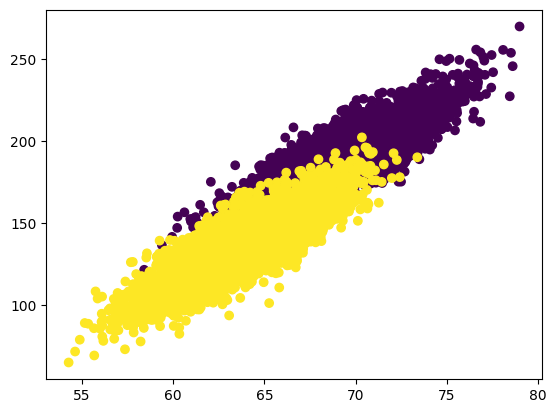

In [ ]:
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

# X is the features in our dataset
X = data.iloc[:,1:3].values

y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)
plt.scatter(X[:,0], X[:,1],c=y)

###  Split the data into training and test data

In [ ]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Train the perceptron algorithm using the training data

In [ ]:
# learning rate (eta) of 0.1 and 50 epochs
ppn = Perceptron(epochs=50, eta=0.1)

ppn.train(X_train, y_train)
y_pred = ppn.predict(X_test)

### Calculate the accuarcy score using the test data and sklearn.metrics

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8545454545454545


### Visualisation
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

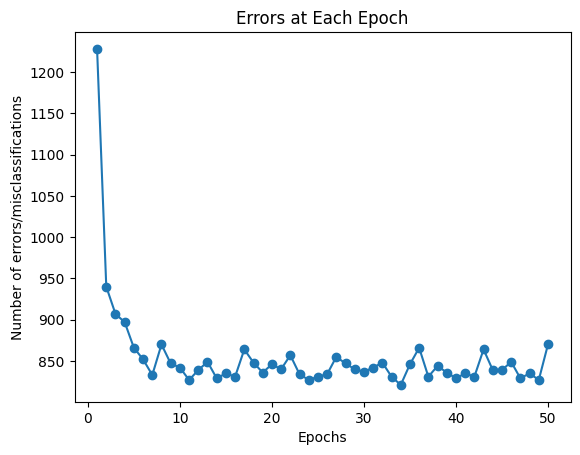

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors/misclassifications')
plt.title('Errors at Each Epoch')
plt.show()

### Using many random inputs (e.g. 5000), plot to see if you can see the decision boundary.

<Axes: xlabel='Height', ylabel='Weight'>

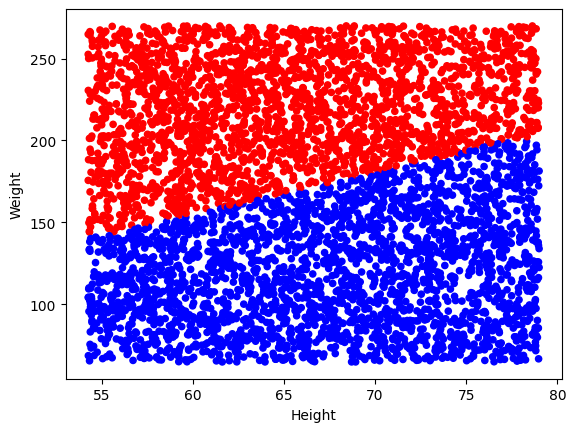

In [ ]:
no_of_samples = 5000

# using minimum and maximum value of the dataset as random boundaries
random_heights = np.random.uniform(min(data["Height"]), max(data["Height"]), no_of_samples)
random_weights = np.random.uniform(min(data["Weight"]), max(data["Weight"]), no_of_samples)
random_data = pandas.DataFrame({'Height': random_heights, 'Weight': random_weights})

predicted_gender = ppn.predict(random_data)
predicted_gender_data = pandas.Series(predicted_gender)

colors = {-1:'red',+1:'blue'}
random_data.plot(kind='scatter',x='Height',y='Weight',c=predicted_gender_data.map(colors))

### Then, discuss the following in Markdown cells:
#### 1.Describe what is happening as the training progresses?

As the training progresses, the algorithm is learning to find a decision boundary that separates the two gender based on the height and weight. During each iteration, the algorithm updates its weights to minimize misclassifications. The error decreases with each iteration, and the decision boundary gradually adjusts to better classify the data.
#### 2.Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?

We did not arrive at the very best solution at the last epoch. The number of errors generally decreases with each epoch, but it's possible that the algorithm converges to a solution that is not the absolute best.
#### 3.Why can’t we get zero error with this data?

The data might not be linearly separable (which is often the case in real-world datasets),in that case, this algorithm will not be able to achieve zero errors.
